# Bike Sharing Dataset Exploration
## by *George Samir Fahmy*

## Preliminary Wrangling

This document explores a dataset of the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load original dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.duplicated().any())
print(bike.info())

(731, 16)
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [4]:
# Summary statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Cleanup

The original dataset does not include any null or duplicates, however it includes a number of categorical attributes that are encoded as numerical.    
An updated dataset with corrected categorical attributes is to be generated.

In [5]:
# Create new dataframe
df = pd.DataFrame()

In [6]:
# Quantitive attributes are to be copied as is
df[['month', 'temperature', 'feeling_temperature', 'humidity', 'windspeed', 'bike_rentals']] = bike[['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [7]:
# Qualitative columns are to be decoded to meaningful values
# years 0: 2011, 1: 2012
df['year'] = bike['yr'].map({0: '2011', 1: '2012'})

In [8]:
# weather situation is an index, to be kept as is
df['weather_situation'] = bike['weathersit']

In [9]:
# seasons 1: spring, 2: summer, 3: fall, 4: winter
df['season'] = bike['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# set seasons order
ordered_seasons = pd.api.types.CategoricalDtype(ordered=True, categories=['Spring', 'Summer', 'Fall', 'Winter'])
df['season'] = df['season'].astype(ordered_seasons)

In [10]:
# The weekdays are encoded 0-6, however it is not clear which day corresponds to 0
bike.groupby('weekday')['workingday'].mean()

weekday
0    0.000000
1    0.857143
2    0.990385
3    0.990385
4    0.980769
5    0.980769
6    0.000000
Name: workingday, dtype: float64

In [11]:
# Days 0 and 6 are never set to working days, therefore it is safe to assume 6 represents Saturday and 0 is Sunday
df['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# set weekdays order
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df['weekday'] = df['weekday'].astype(ordered_weekdays)

In [12]:
# Updated dataset containing features of interest
print(df.shape)
df.head()

(731, 10)


,month,temperature,feeling_temperature,humidity,windspeed,bike_rentals,year,weather_situation,season,weekday
0,1,0.344167,0.363625,0.805833,0.160446,985,2011,2,Spring,Saturday
1,1,0.363478,0.353739,0.696087,0.248539,801,2011,2,Spring,Sunday
2,1,0.196364,0.189405,0.437273,0.248309,1349,2011,1,Spring,Monday
3,1,0.200000,0.212122,0.590435,0.160296,1562,2011,1,Spring,Tuesday
4,1,0.226957,0.229270,0.436957,0.186900,1600,2011,1,Spring,Wednesday


### What is the structure of your dataset?

The updated dataset contains the bike rental counts of 731 days, with 10 features: 
* **Quantitative (normalized):** temperature, feeling temperature, humidity, windspeed
* **Quantitative:** bike rentals
* **Qualitative:** weekday, month, year and season, and weather situation

>`weather_situation` is an indicator of weather (clouds, rain, snow, etc.), with `1` being best and `4` being the worst conditions.

### What is/are the main feature(s) of interest in your dataset?

Predicting the most effective features on bike rentals.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

It is expected that the feeling temperature will have the strongest effect on the number of bike rentals. The rental count is also affected by weather situation and season, albeit to a lesser degree.

## Univariate Exploration

Exploring the main feature of interest: bike rentals.

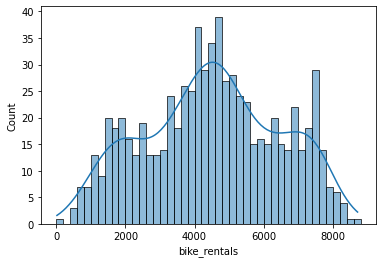

In [13]:
sb.histplot(data=df, x='bike_rentals', kde=True, bins=np.arange(0, df['bike_rentals'].max() + 2e2, 2e2));

Next, exploring main feature of interest: feeling temperatures.

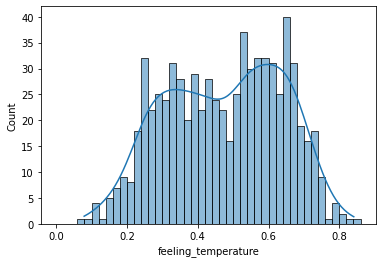

In [14]:
sb.histplot(data=df, x='feeling_temperature', kde=True, bins=np.arange(0, df['feeling_temperature'].max() + 2e-2, 2e-2));

>**Observation:** For both of the plotted features the distributions are valid, with no apparent outliers. The rentals show a normal distribution, while the feeling temperature has a slightly bimodal distribution.

Moving on to the qualitative features.

<AxesSubplot:xlabel='weather_situation', ylabel='count'>

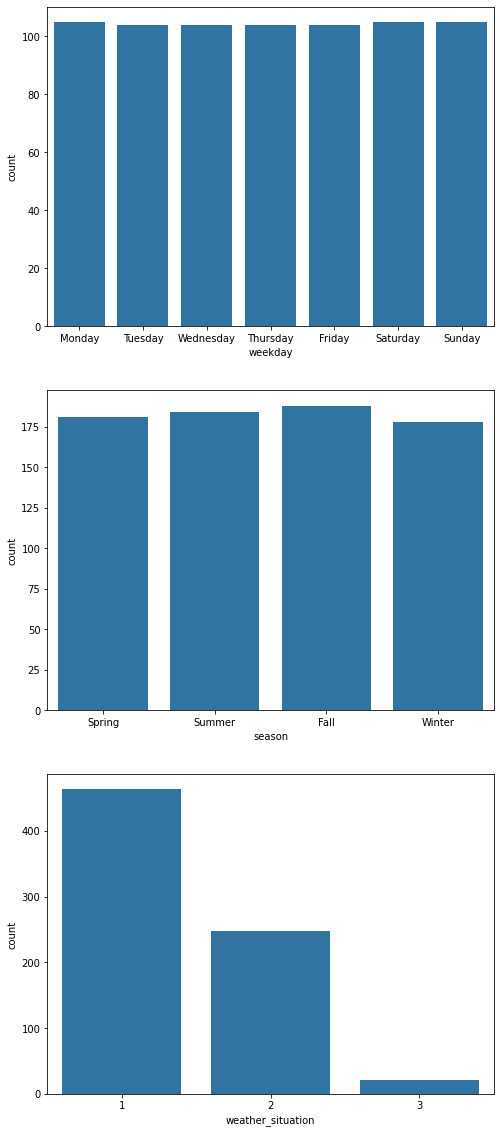

In [15]:
base_color = sb.color_palette()[0]

fig, ax = plt.subplots(nrows=3, figsize=[8, 20])

sb.countplot(data=df, x='weekday', color=base_color, ax=ax[0])
sb.countplot(data=df, x='season', color=base_color, ax=ax[1])
sb.countplot(data=df, x='weather_situation', color=base_color, ax=ax[2])

>**Observation:** The dataset includes nearly identical number of enteries for each weekday, and each season, with Fall season being slightly on top. For the weather situation, a clear sky is the most common.    
The month attribute was ommited from the exploration it relates to the same information as thr season.

Lastly, exploring the remainder of the quantitative features

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

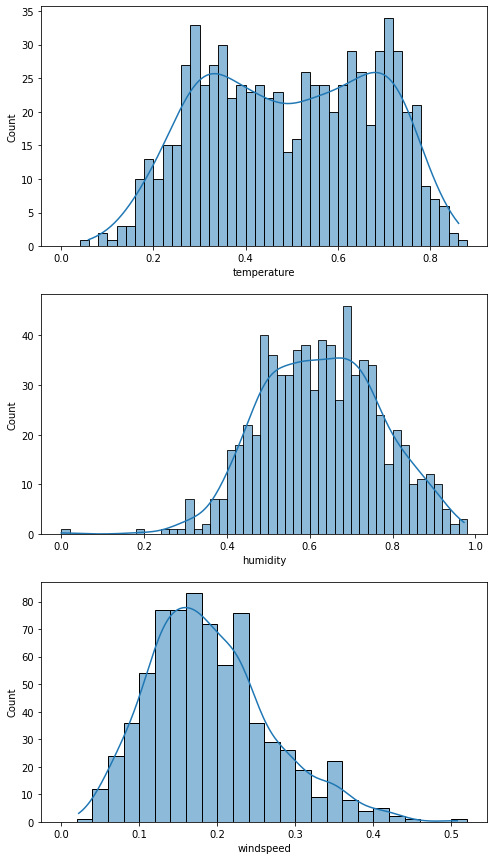

In [16]:
fig, ax = plt.subplots(nrows=3, figsize=[8, 15])

sb.histplot(data=df, x='temperature', kde=True, ax=ax[0], bins=np.arange(0, df['temperature'].max() + 2e-2, 2e-2))
sb.histplot(data=df, x='humidity', kde=True, ax=ax[1], bins=np.arange(0, df['humidity'].max() + 2e-2, 2e-2))
sb.histplot(data=df, x='windspeed', kde=True, ax=ax[2], bins=np.arange(0, df['windspeed'].max() + 2e-2, 2e-2))

In [17]:
# Some slight outliers are observed for each feature, they are further examined below
low_outliers = (df['humidity'] < 0.2) | (df['temperature'] < 0.06)
high_outlighers = df['windspeed'] > 0.5

df.loc[low_outliers | high_outlighers]

,month,temperature,feeling_temperature,humidity,windspeed,bike_rentals,year,weather_situation,season,weekday
21,1,0.059130,0.079070,0.400000,0.171970,981,2011,1,Spring,Saturday
49,2,0.399167,0.391404,0.187917,0.507463,1635,2011,1,Spring,Saturday
68,3,0.389091,0.385668,0.000000,0.261877,623,2011,3,Spring,Thursday


>**Observation:** A zero humidity is a physcial impossibility, therefore it shall be removed.

<AxesSubplot:xlabel='humidity', ylabel='Count'>

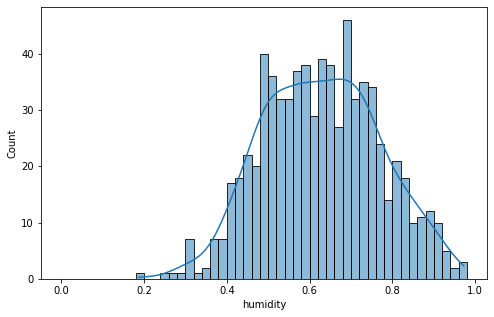

In [18]:
df = df.query('humidity > 0.0')

plt.figure(figsize=[8, 5])
sb.histplot(data=df, x='humidity', kde=True, bins=np.arange(0, df['humidity'].max() + 2e-2, 2e-2))

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The bike rentals variable showed a relatively normal distribution, peaking at the 4600-4800 rentals per day mark.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

A countable number of outliers were observed by plotting the temperature, humidity, and windspeed. However only one needed to be removed as it pertained to a physically impossible situation (zero humidity).

## Bivariate Exploration

In [19]:
numeric_features = ['temperature', 'humidity', 'windspeed', 'feeling_temperature', 'bike_rentals']
categoric_features = ['season', 'weekday', 'weather_situation']

For bivariate exploration, it is of interest to observe the different correlations between the numerical variables.

<AxesSubplot:>

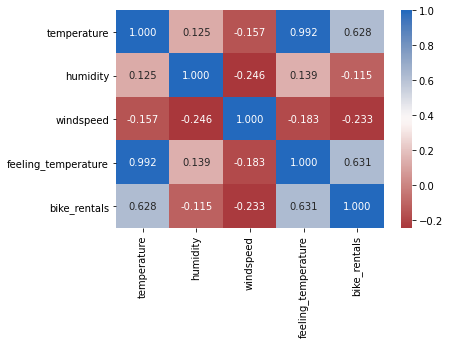

In [20]:
sb.heatmap(df[numeric_features].corr(), annot=True, fmt='.3f', cmap='vlag_r')

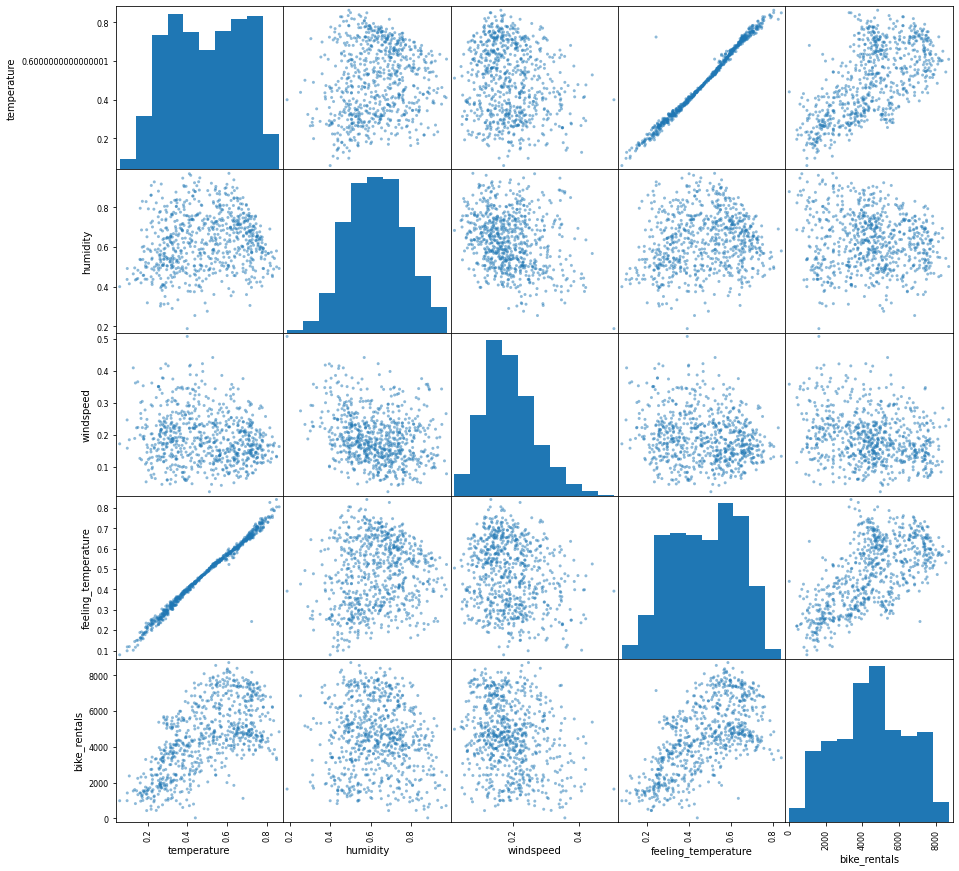

In [21]:
pd.plotting.scatter_matrix(df[numeric_features], figsize=[15, 15]);

>**Observation:** Unsurprisingly, the temperature and feeling temperature had the highest correlation. In addition, both of the temperature attributes had an above average correlation with bike rentals, with feeling temperature being slightly hight. The other numeric variables showed no significant correlation with the bike rentals.

Plotting the relationship between feeling temperature and bike rentals only for detailed examination.

<AxesSubplot:xlabel='feeling_temperature', ylabel='bike_rentals'>

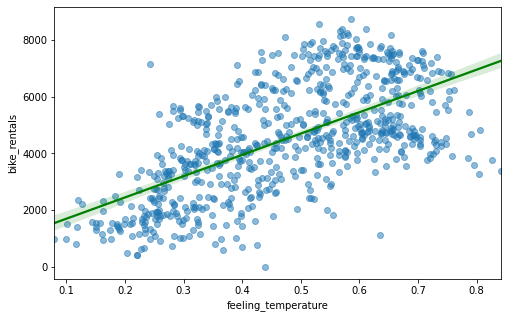

In [22]:
plt.figure(figsize=[8, 5])
sb.regplot(data=df, x='feeling_temperature', y='bike_rentals', scatter_kws={'alpha':0.5}, line_kws={'color':'Green'})

>**Observation:** A linear relationship can be observed between these two variable, albeit with not-so-high correlation.

Moving on to categorical variables. In this part the effect of the categorical features on bike rentals and feeling temperatures is examined.

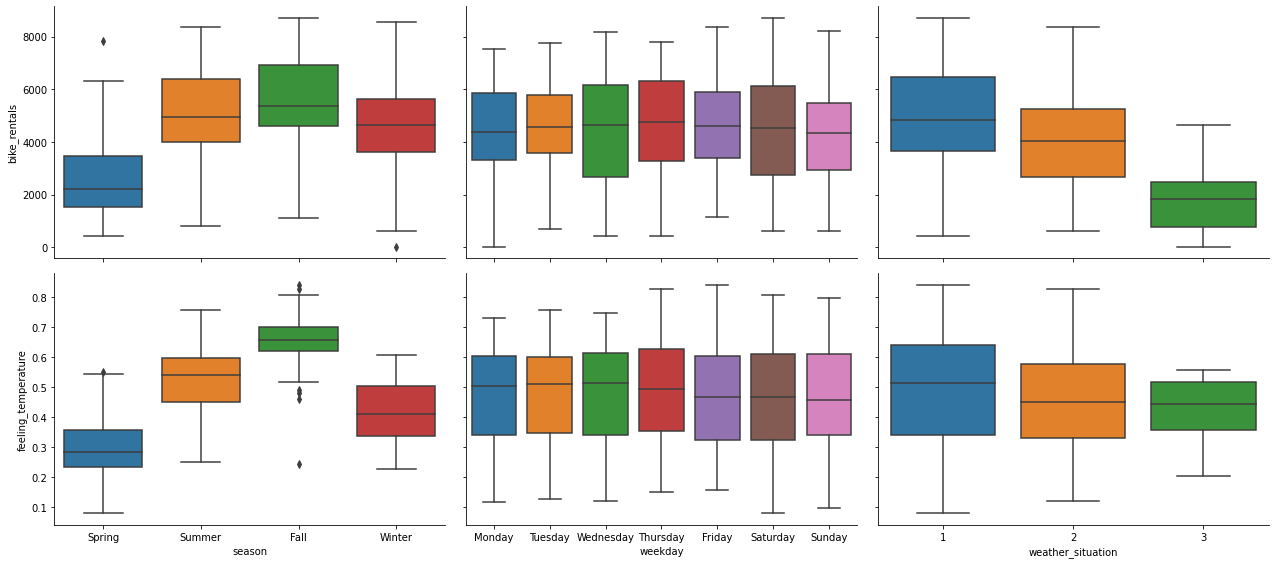

In [23]:
sb.PairGrid(data=df, x_vars=categoric_features, y_vars=['bike_rentals', 'feeling_temperature'], height=4, aspect=1.5).map(sb.boxplot)

>**Observation:** Surprisingly, weekday had minimal effect on the number of bike rentals (opposed to the expected increase during weekends/holidays). Seasons and weather situation are shown to have an obervable effect of the bike rentals, with Fall and weather index `1` having the highest number of rentals.

<AxesSubplot:xlabel='season', ylabel='count'>

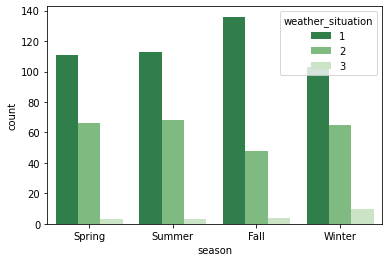

In [24]:
sb.countplot(data=df, x='season', hue='weather_situation', palette='Greens_r')

>**Observation:** Fall season is observed to have the highest number of occurences of the best weather situation, which further explains why the number of rentals increase in this season.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Bike rentals had an above average correlation with the feeling temperature as expected earlier. In addition, the season also had a substantial effect on the number of bike rentals, which peaks on the fall: the season that had the most occurance of favourable weather situations.    
Unlike expectation, weekdays and holidays/weekends had no significant effect on the number of bike rentals.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expectedly, temperature and feeling temperature had a high correlation with one another. It was expected that humidity might have an effect on the feeling temperature, however this did not turn out to be a valid assumption.

## Multivariate Exploration

This part aims to further explore the relationships of the three main features that affect bike rentals: feeling temperature, season and weather situation.

<Figure size 1080x1080 with 0 Axes>

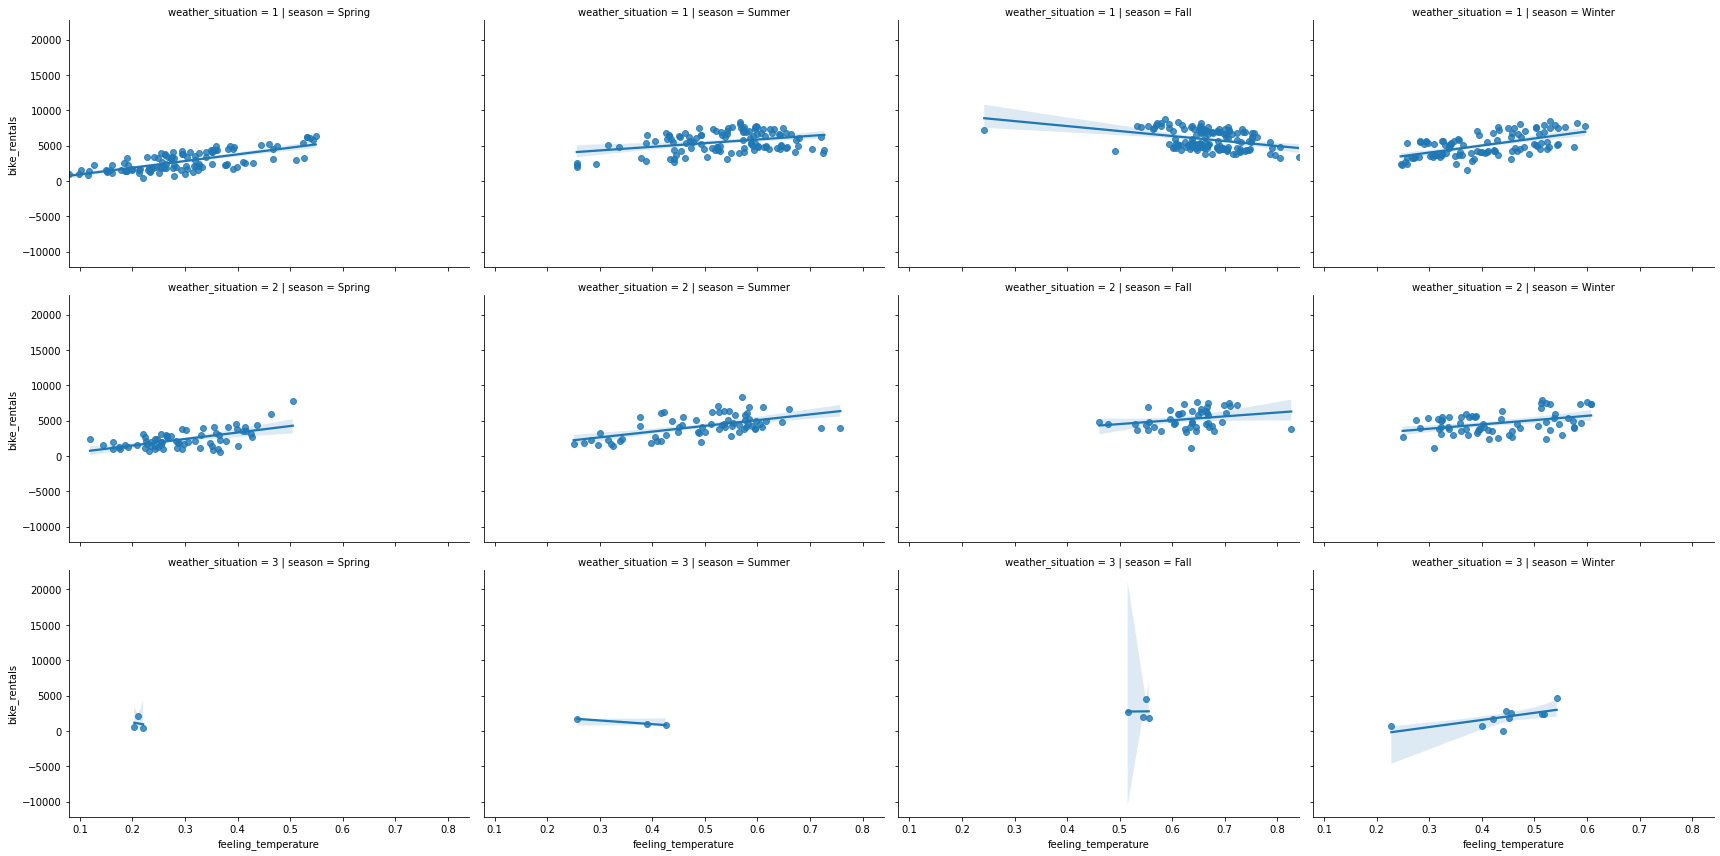

In [25]:
plt.figure(figsize=[15, 15])
sb.FacetGrid(data=df, col='season', row='weather_situation', height=4, aspect=1.5).map(sb.regplot, 'feeling_temperature', 'bike_rentals')

>**Observation:** The more detailed scatter plots further confirmed the conclusion about the positive feeling temperatures on the number of bike rentals.    
Nevertheless, an interesting relationship showed up where the feeling temperature is inversely proportinal to the number of bike rentals, during fall season when the weather situation is 1.

<AxesSubplot:xlabel='season', ylabel='bike_rentals'>

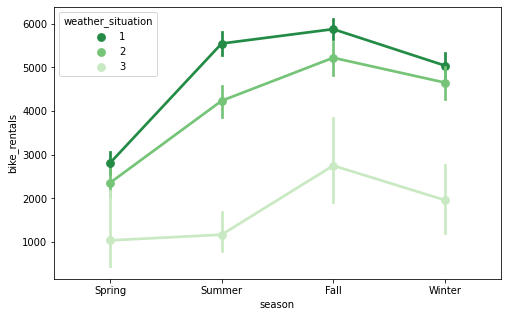

In [26]:
plt.figure(figsize=[8, 5])
sb.pointplot(data=df, x='season', y='bike_rentals', hue='weather_situation', palette='Greens_r')

*Bonus* observe the trend of bike rentals across the two years.

<AxesSubplot:xlabel='month', ylabel='bike_rentals'>

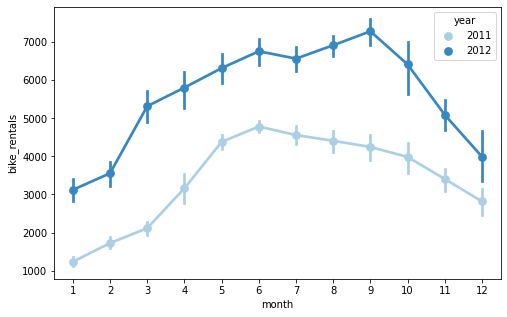

In [27]:
plt.figure(figsize=[8, 5])
sb.pointplot(data=df, x='month', y='bike_rentals', hue='year', palette='Blues')

>**Observation:** While not directly related to our features of interest, there seems to be quite an increase in the number of bike rentals in 2012 comapred to 2011, across all the months.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The investigation of affectors of bike rentals are further investigated by looking at the categorical features as well. The multivariate plots showed a certain positive correlation between fall seasons, better weather situation and high bike rentals.

### Were there any interesting or surprising interactions between features?

None. However it was surprising to see the jump in daily bike rentals between 2011 and 2012.

In [28]:
df.to_pickle('day_update.pkl')

<AxesSubplot:xlabel='month'>

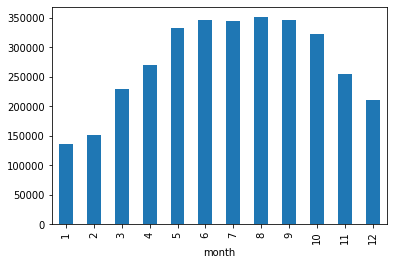

In [33]:
df.groupby('month')['bike_rentals'].sum().plot.bar()